# FDS project 21/22 - Heart Disease Prediction

### Authors
- Elios Buzo
- Laurentiu Adrian Crsturean
- Anthony Giusti
- Ludovico Lentini
- Michele Spina

# Clean and analyze the dataset

## A first look

### What type of thata there are

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#Import the original dataset
ds = pd.read_csv('dataset.csv')
#ds.head()

#Print the number of null values
ds.isnull().sum()
#ds.info()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [38]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [39]:
'''
ds.drop("Age",axis=1,inplace=True)
ds.drop("Sex",axis=1,inplace=True)
ds.drop("ChestPainType",axis=1,inplace=True)
ds.drop("RestingBP",axis=1,inplace=True)
ds.drop("Embarked",axis=1,inplace=True)
'''

'\nds.drop("Age",axis=1,inplace=True)\nds.drop("Sex",axis=1,inplace=True)\nds.drop("ChestPainType",axis=1,inplace=True)\nds.drop("RestingBP",axis=1,inplace=True)\nds.drop("Embarked",axis=1,inplace=True)\n'

We can immediatly observe that there are some categorical values and there isn't null values, but we must analyze if all the data are consistent

In [40]:
ds.describe(include = 'all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


The minimum value for the attribute **Cholesterol** and **RestingBP** is 0 and it isn't consisten.

In [41]:
print(np.sum(np.asarray(ds["Cholesterol"] == 0)))

172


In [53]:
print(np.sum(np.asarray(ds["RestingBP"] == 0)))

1


### How data are distributed

<AxesSubplot:xlabel='ST_Slope', ylabel='Count'>

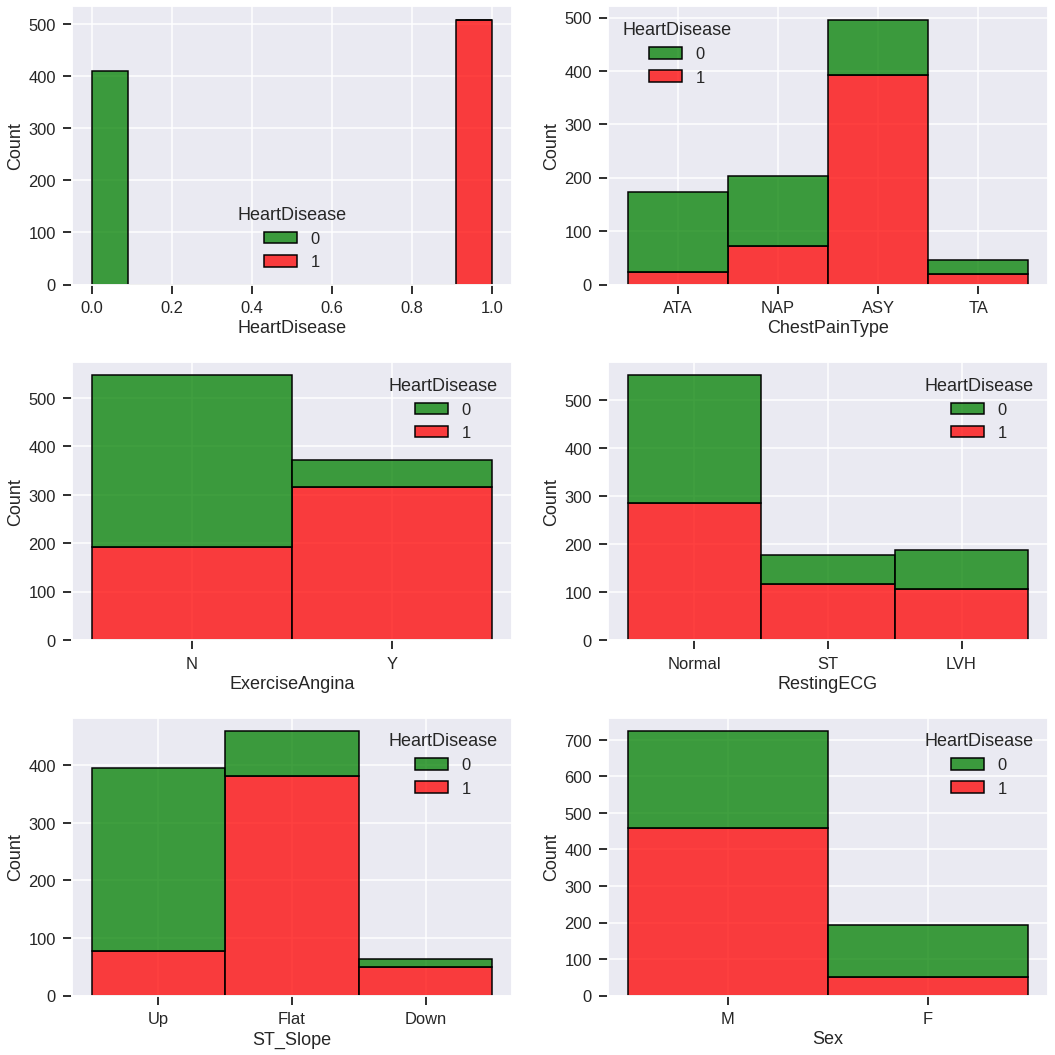

In [67]:
oe=['g','r']
fig = plt.figure(figsize=(15,15))


plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=ds, x="HeartDisease", hue="HeartDisease",multiple="stack",palette=oe)
#ax.set(xlabel='Sex ', ylabel='Count')

plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=ds, x="Sex", hue="HeartDisease",multiple="stack",palette=oe)
#ax.set(xlabel='Sex ', ylabel='Count')

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=ds, x="ChestPainType", hue="HeartDisease",multiple="stack",palette=oe)
#ax.set(xlabel='ChestPainType', ylabel='Count')

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=ds, x="ExerciseAngina", hue="HeartDisease",multiple="stack",palette=oe)
#ax.set(xlabel='ExerciseAngina', ylabel='Count')

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=ds, x="RestingECG", hue="HeartDisease",multiple="stack",palette=oe)
#ax.set(xlabel='RestingECG', ylabel='Count')

plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=ds, x="ST_Slope", hue="HeartDisease",multiple="stack",palette=oe)
#ax.set(xlabel='ST_Slope', ylabel='Count')



<AxesSubplot:xlabel='HeartDisease', ylabel='Count'>

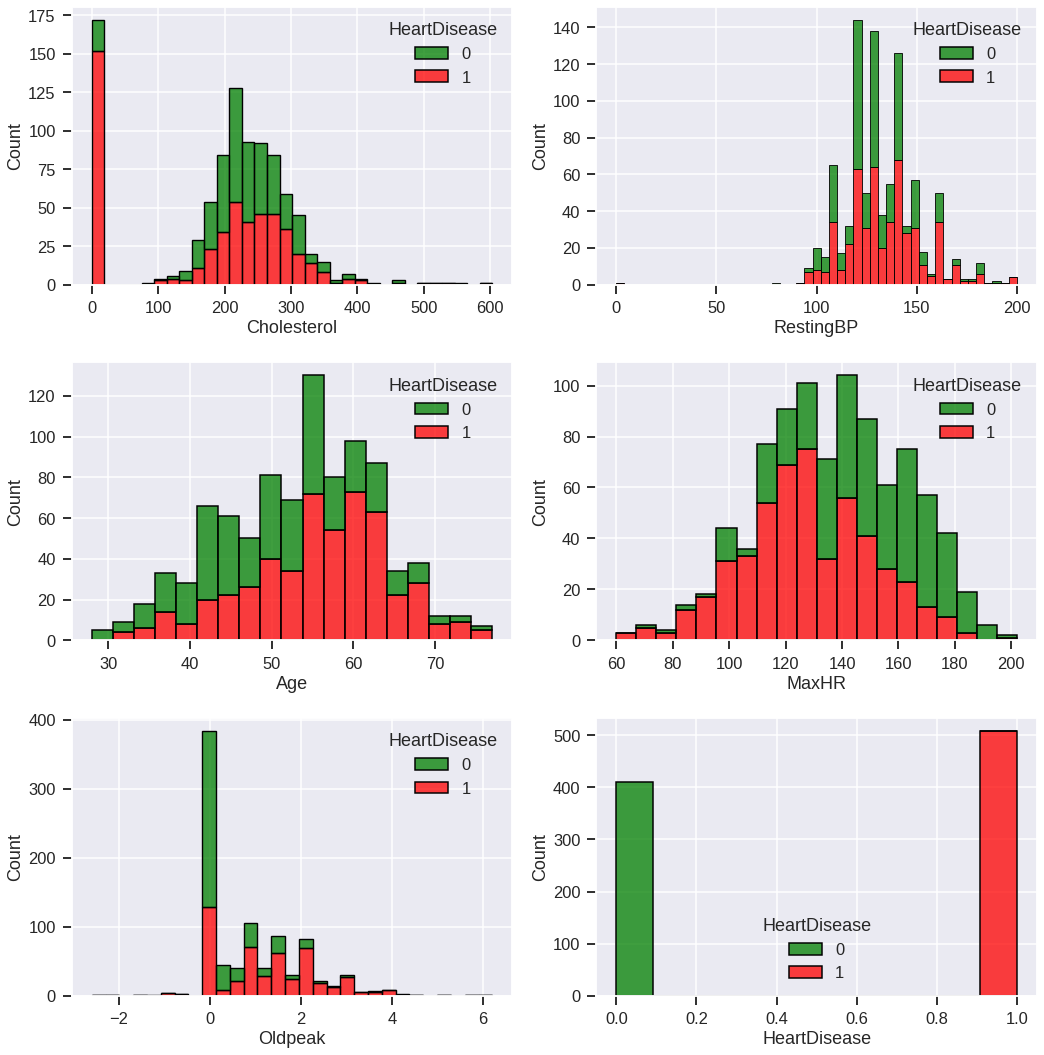

In [63]:
oe=['g','r']
fig = plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=ds, x="Cholesterol", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=ds, x="RestingBP", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=ds, x="Age", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=ds, x="MaxHR", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=ds, x="Oldpeak", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=ds, x="FastingBS", hue="HeartDisease",multiple="stack",palette=oe)


## From categorical to numeric

We must convert categorical data to numerical data

In [60]:
'''
I want rappresent the heatmap here
Maybe we should do that after clean the dataset or show two differents heatmap: one whitout cholesterol 
and one only with colesterol, deleting rows with value 0
'''
#ds.columns
#ds.drop(ds.columns['ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope','Sex']), axis=1).set_index('Age')

sns.heatmap(ds, annot=True)

ValueError: could not convert string to float: 'M'

## How can we manage inconsisten values?

This link contains some useful ways:
https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/

### Deleting the column with missing data

In [7]:

ds_noC = pd.read_csv('dataset.csv')
del ds_noC["Cholesterol"]
del ds_noC["RestingBP"]
ds_noC.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   FastingBS       918 non-null    int64  
 4   RestingECG      918 non-null    object 
 5   MaxHR           918 non-null    int64  
 6   ExerciseAngina  918 non-null    object 
 7   Oldpeak         918 non-null    float64
 8   ST_Slope        918 non-null    object 
 9   HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 71.8+ KB


In [8]:
ds_noC.describe()

,Age,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.233115,136.809368,0.887364,0.553377
std,9.432617,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,1.000000,202.000000,6.200000,1.000000


### Deleting the column with missing data

In [9]:
#ds_noR = pd.read_csv('dataset.csv')
ds_noR = ds.drop(ds[ds.Cholesterol == 0].index)
ds_noR.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    int64  
 6   RestingECG      746 non-null    object 
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    object 
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    object 
 11  HeartDisease    746 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 75.8+ KB


In [10]:
ds_noR.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Filling the Missing Values – Imputation

WE SHOULD FIND A WAY TO REPLACE 0 WITH THE MEAN VALUE ON CHOLESTEROL AND RESTINGBP

In [11]:
ds_fill = ds
ds_fill.Cholesterol.replace(0, 244.635389)
ds_fill["RestingBP"].replace(0, 133.022788)
ds_fill.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [12]:
ds.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Imputation with an additional column

### Filling with a Regression Model

+++ MAYBE THIS IS TOO MUCH +++

## Normalize values